In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
fire=pd.read_csv('wildfiredb.csv')

# Data cleaning

In [3]:
 fire.isnull().sum().sort_values()

Polygon_ID                 0
EVH2014_mode               0
EVH2014_count              0
EVH2014_mean               0
EVH2016_max                0
                          ..
Neighbour_CH2012_mode     29
Neighbour_CH2012_count    29
Neighbour_CH2012_mean     29
Neighbour_CH2014_min      29
Neighbour_SLP2016_mean    29
Length: 397, dtype: int64

In [4]:
#IN THE SELECTION OF VARIABLES, THE NEIGHBOR'S PARAMETERS ARE NOT SELECTED,
# BECAUSE WE ALREADY HAVE THE NEIGHBOR'S FRP DATA

fire1=fire[['Polygon_ID', 'acq_date', 'frp', 'Neighbour_frp','Neighbour']]

fire2=fire[['CBH2012_max', 'CBH2012_min', 'CBH2012_mean',
          'CBH2014_max', 'CBH2014_min', 'CBH2014_mean', 'CBH2016_max',
           'CBH2016_min','CBH2016_mean',]]
fire3=fire[['CBD2012_mean','CBD2016_mean']]
fire4=fire[[ 'CC2012_mean','CC2014_mean','CC2016_mean']]
fire5=fire[['CH2012_mean', 'CH2014_mean', 'CH2016_mean']]
fire6=fire[['ELEV2016_max', 'ELEV2016_min', 'ELEV2016_mean']]
fire7=fire[['EVC2012_mean','EVC2014_mean','EVC2016_mean',]]
fire8=fire[['EVH2012_mean', 'EVH2014_mean','EVH2016_mean']]
fire9=fire[[ 'EVT2012_mean', 'EVT2014_mean','EVT2016_mean']]
fire10=fire[['SLP2016_max','SLP2016_min', 'SLP2016_mean','SLP2016_sum']]
fire11=fire[['Neighbour_ELEV2016_max','Neighbour_ELEV2016_min', 'Neighbour_ELEV2016_mean']]
fire12=fire[['Neighbour_SLP2016_max', 'Neighbour_SLP2016_min','Neighbour_SLP2016_mean']]
fire13=fire[['FVH2016_mean','FVT2016_mean']]


In [5]:
fire_complet = pd.concat([fire1,fire2,fire3,fire4,fire5,fire6,fire7,fire8,fire9,fire10,fire11,fire12,fire13],axis=1)

In [6]:
fire_complet.shape

(2367209, 46)

In [7]:
fire1.isnull().sum()

Polygon_ID       0
acq_date         0
frp              0
Neighbour_frp    0
Neighbour        0
dtype: int64

In [8]:
fire_complet.dtypes

Polygon_ID                   int64
acq_date                    object
frp                        float64
Neighbour_frp              float64
Neighbour                    int64
CBH2012_max                float64
CBH2012_min                float64
CBH2012_mean               float64
CBH2014_max                float64
CBH2014_min                float64
CBH2014_mean               float64
CBH2016_max                float64
CBH2016_min                float64
CBH2016_mean               float64
CBD2012_mean               float64
CBD2016_mean               float64
CC2012_mean                float64
CC2014_mean                float64
CC2016_mean                float64
CH2012_mean                float64
CH2014_mean                float64
CH2016_mean                float64
ELEV2016_max               float64
ELEV2016_min               float64
ELEV2016_mean              float64
EVC2012_mean               float64
EVC2014_mean               float64
EVC2016_mean               float64
EVH2012_mean        

In [9]:
#TAKE A REPRESENTATIVE SAMPLE OF THE DATA 
#TAKING 30% OF THE DATA 
fire_30=fire_complet.sample(n = 710164)
fire_30

,Polygon_ID,acq_date,frp,Neighbour_frp,Neighbour,CBH2012_max,CBH2012_min,CBH2012_mean,CBH2014_max,CBH2014_min,...,SLP2016_mean,SLP2016_sum,Neighbour_ELEV2016_max,Neighbour_ELEV2016_min,Neighbour_ELEV2016_mean,Neighbour_SLP2016_max,Neighbour_SLP2016_min,Neighbour_SLP2016_mean,FVH2016_mean,FVT2016_mean
640459,926320,2012-08-27,6.05,0.0,926604,100.0,0.0,30.395834,100.0,0.0,...,13.055555,1880.0,627.0,514.0,572.0710,35.0,4.0,16.437870,606.31250,2084.0625
1236974,686190,2017-09-07,1.30,0.0,686191,10.0,3.0,6.652778,10.0,3.0,...,15.083333,2172.0,2146.0,1924.0,2026.7565,38.0,15.0,25.641026,626.65280,2033.4097
1600705,1602346,2013-08-22,13.70,1.8,1602516,100.0,0.0,15.782051,100.0,0.0,...,24.519230,3825.0,1603.0,1474.0,1531.7821,29.0,2.0,18.307692,588.29486,2045.8654
1281411,189211,2015-09-11,4.60,0.0,189384,100.0,0.0,16.166666,100.0,0.0,...,8.437500,1215.0,704.0,650.0,681.4438,23.0,1.0,10.662722,620.95830,2117.8057
1792482,854083,2015-09-09,1.30,6.9,854367,9.0,0.0,7.243590,9.0,0.0,...,24.282051,3788.0,1689.0,1503.0,1609.8141,36.0,5.0,23.314102,628.64746,2032.4359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470352,929677,2012-08-28,24.60,0.0,929678,12.0,0.0,7.794872,12.0,0.0,...,30.282051,4724.0,1499.0,1321.0,1418.3611,34.0,15.0,24.916666,639.00000,2028.0000
948152,958186,2012-08-11,10.60,18.7,958185,12.0,0.0,6.687500,17.0,0.0,...,18.743055,2699.0,2210.0,2163.0,2197.7756,16.0,0.0,5.653846,630.73610,2036.5555
1352664,672081,2018-07-16,1.70,4.2,671891,100.0,0.0,46.846153,100.0,0.0,...,28.641026,4468.0,1146.0,897.0,1030.0355,46.0,2.0,32.242603,608.05770,2049.4102
1298004,223689,2017-12-16,27.80,4.1,223977,0.0,0.0,0.000000,10.0,0.0,...,16.875740,2852.0,1199.0,1106.0,1153.0972,38.0,4.0,16.638890,542.37280,2110.2427


In [10]:
fire_30['acq_date']=pd.to_datetime(fire_30['acq_date'], format="%Y-%m-%d")
fire_30

,Polygon_ID,acq_date,frp,Neighbour_frp,Neighbour,CBH2012_max,CBH2012_min,CBH2012_mean,CBH2014_max,CBH2014_min,...,SLP2016_mean,SLP2016_sum,Neighbour_ELEV2016_max,Neighbour_ELEV2016_min,Neighbour_ELEV2016_mean,Neighbour_SLP2016_max,Neighbour_SLP2016_min,Neighbour_SLP2016_mean,FVH2016_mean,FVT2016_mean
640459,926320,2012-08-27,6.05,0.0,926604,100.0,0.0,30.395834,100.0,0.0,...,13.055555,1880.0,627.0,514.0,572.0710,35.0,4.0,16.437870,606.31250,2084.0625
1236974,686190,2017-09-07,1.30,0.0,686191,10.0,3.0,6.652778,10.0,3.0,...,15.083333,2172.0,2146.0,1924.0,2026.7565,38.0,15.0,25.641026,626.65280,2033.4097
1600705,1602346,2013-08-22,13.70,1.8,1602516,100.0,0.0,15.782051,100.0,0.0,...,24.519230,3825.0,1603.0,1474.0,1531.7821,29.0,2.0,18.307692,588.29486,2045.8654
1281411,189211,2015-09-11,4.60,0.0,189384,100.0,0.0,16.166666,100.0,0.0,...,8.437500,1215.0,704.0,650.0,681.4438,23.0,1.0,10.662722,620.95830,2117.8057
1792482,854083,2015-09-09,1.30,6.9,854367,9.0,0.0,7.243590,9.0,0.0,...,24.282051,3788.0,1689.0,1503.0,1609.8141,36.0,5.0,23.314102,628.64746,2032.4359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470352,929677,2012-08-28,24.60,0.0,929678,12.0,0.0,7.794872,12.0,0.0,...,30.282051,4724.0,1499.0,1321.0,1418.3611,34.0,15.0,24.916666,639.00000,2028.0000
948152,958186,2012-08-11,10.60,18.7,958185,12.0,0.0,6.687500,17.0,0.0,...,18.743055,2699.0,2210.0,2163.0,2197.7756,16.0,0.0,5.653846,630.73610,2036.5555
1352664,672081,2018-07-16,1.70,4.2,671891,100.0,0.0,46.846153,100.0,0.0,...,28.641026,4468.0,1146.0,897.0,1030.0355,46.0,2.0,32.242603,608.05770,2049.4102
1298004,223689,2017-12-16,27.80,4.1,223977,0.0,0.0,0.000000,10.0,0.0,...,16.875740,2852.0,1199.0,1106.0,1153.0972,38.0,4.0,16.638890,542.37280,2110.2427


In [11]:
fire_30.shape

(710164, 46)

# LET'S TRY TO GET  GRAPHS WITH ALL THE VARIABLES 

In [12]:
fire_30=fire_30.sort_values(by='acq_date').reset_index()

In [13]:
fire_30=fire_30.drop(['index'],axis=1)

In [14]:
fire_30

,Polygon_ID,acq_date,frp,Neighbour_frp,Neighbour,CBH2012_max,CBH2012_min,CBH2012_mean,CBH2014_max,CBH2014_min,...,SLP2016_mean,SLP2016_sum,Neighbour_ELEV2016_max,Neighbour_ELEV2016_min,Neighbour_ELEV2016_mean,Neighbour_SLP2016_max,Neighbour_SLP2016_min,Neighbour_SLP2016_mean,FVH2016_mean,FVT2016_mean
0,2352366,2012-01-20,1.4,0.0,2352724,20.0,0.0,8.307693,20.0,0.0,...,7.576923,1182.0,2248.0,2191.0,2221.673600,20.0,1.0,9.194445,626.576900,2033.2693
1,287013,2012-01-20,0.5,0.0,287012,0.0,0.0,0.000000,0.0,0.0,...,7.782051,1214.0,288.0,232.0,281.142000,38.0,0.0,4.402367,297.506400,2260.3845
2,379463,2012-01-20,2.5,0.0,380089,0.0,0.0,0.000000,0.0,0.0,...,0.923077,144.0,360.0,353.0,356.211550,3.0,0.0,1.038462,23.153847,2903.1538
3,287013,2012-01-20,0.5,0.0,287014,0.0,0.0,0.000000,0.0,0.0,...,7.782051,1214.0,277.0,234.0,260.846160,16.0,0.0,5.721893,297.506400,2260.3845
4,379463,2012-01-20,2.5,0.0,380091,0.0,0.0,0.000000,0.0,0.0,...,0.923077,144.0,348.0,339.0,344.230770,4.0,0.0,1.185898,23.153847,2903.1538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710159,1616293,2018-12-31,2.1,0.0,1616346,0.0,0.0,0.000000,0.0,0.0,...,4.944445,712.0,17.0,7.0,11.195267,9.0,0.0,2.414201,23.368055,2903.9236
710160,1616293,2018-12-31,2.1,0.0,1616240,0.0,0.0,0.000000,0.0,0.0,...,4.944445,712.0,60.0,22.0,38.035503,16.0,2.0,9.041420,23.368055,2903.9236
710161,2376140,2018-12-31,1.8,0.0,2376141,49.0,0.0,8.108974,49.0,0.0,...,0.224359,35.0,47.0,45.0,46.076923,1.0,0.0,0.189349,306.070530,1880.9038
710162,1616293,2018-12-31,2.1,0.0,1616345,0.0,0.0,0.000000,0.0,0.0,...,4.944445,712.0,29.0,12.0,16.128204,13.0,0.0,1.320513,23.368055,2903.9236


In [15]:
fire_30.isnull().sum()

Polygon_ID                  0
acq_date                    0
frp                         0
Neighbour_frp               0
Neighbour                   0
CBH2012_max                 0
CBH2012_min                 0
CBH2012_mean                0
CBH2014_max                 0
CBH2014_min                 0
CBH2014_mean                0
CBH2016_max                 0
CBH2016_min                 0
CBH2016_mean                0
CBD2012_mean                0
CBD2016_mean                0
CC2012_mean                 0
CC2014_mean                 0
CC2016_mean                 0
CH2012_mean                 0
CH2014_mean                 0
CH2016_mean                 0
ELEV2016_max                0
ELEV2016_min                0
ELEV2016_mean               0
EVC2012_mean                0
EVC2014_mean                0
EVC2016_mean                0
EVH2012_mean                0
EVH2014_mean                0
EVH2016_mean                0
EVT2012_mean                0
EVT2014_mean                0
EVT2016_me

In [16]:
#REMOVING THE NANS 
fire_30=fire_30.dropna()

In [17]:
is_year = pd.DatetimeIndex(fire_30['acq_date']).year
is_year

Int64Index([2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='acq_date', length=710154)

In [18]:
#Informative table of the number of fires per year
print(len(is_year[is_year==2012]))
print(len(is_year[is_year==2013]))
print(len(is_year[is_year==2014]))
print(len(is_year[is_year==2015]))
print(len(is_year[is_year==2016]))
print(len(is_year[is_year==2017]))
print(len(is_year[is_year==2018]))

76612
83977
75422
103130
71255
142305
157453


In [19]:
year=[2012,2013,2014,2015,2016,2017,2018]
fires = pd.DataFrame(columns=['Number of fires'],index=year)

In [20]:
fires['Number of fires']=(len(is_year[is_year==2012]),len(is_year[is_year==2013]),len(is_year[is_year==2014]),
                        len(is_year[is_year==2015]),len(is_year[is_year==2016]),len(is_year[is_year==2017]),
                        len(is_year[is_year==2018]))

In [21]:
fires


,Number of fires
2012,76612
2013,83977
2014,75422
2015,103130
2016,71255
2017,142305
2018,157453


Text(0.5, 1.0, 'Potencia Radiativa del Fuego (FRP)')

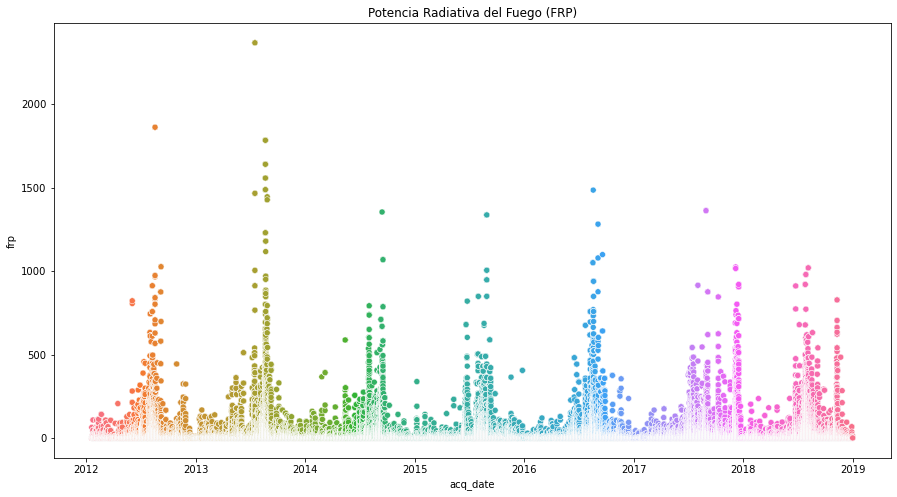

In [22]:
#Behavior of Fire Radiative Power through the years 
plt.figure(figsize=(15,8))
sns.scatterplot(data=fire_30, x="acq_date", y="frp",hue='acq_date',legend=False)
#plt.title('Fire Radiative Power in California')
plt.title('Potencia Radiativa del Fuego (FRP)')

In [23]:
#Number of fires in California per year
frp=fire_30.groupby('acq_date')['Polygon_ID'].count()
frpn=fire_30.groupby('acq_date')['Neighbour'].count()

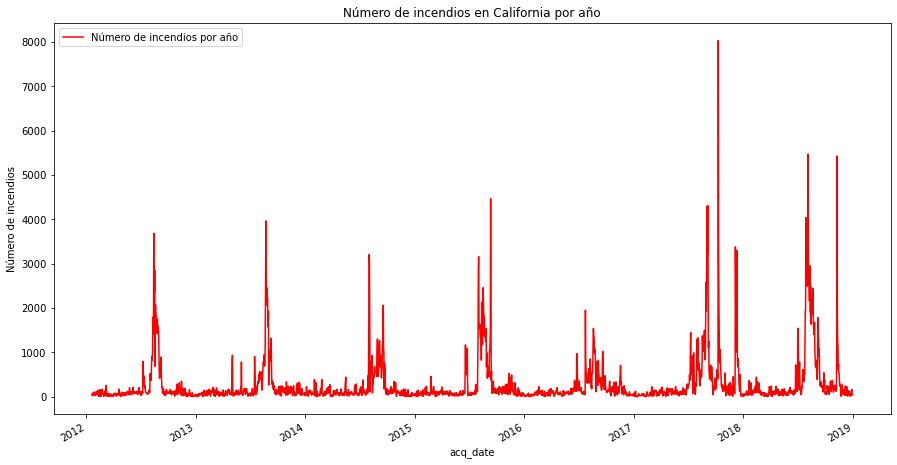

In [24]:
plt.figure(figsize=(15,8))

#frp.plot(label = 'Number of fires per year',color='r')
#plt.ylabel('Number of fires')
#plt.title('Number of fires in California per year')


frp.plot(label = 'Número de incendios por año',color='r')
plt.ylabel('Número de incendios')
plt.title('Número de incendios en California por año')


plt.legend()

In [25]:
is_2012=fire_30.loc [fire_30 ['acq_date']. dt.year == 2012]
is_2015=fire_30.loc [fire_30 ['acq_date']. dt.year == 2015]
is_2018=fire_30.loc [fire_30 ['acq_date']. dt.year == 2018]

In [26]:
is_2012y=is_2012.groupby('acq_date')[['Polygon_ID']].count()
is_2015y=is_2015.groupby('acq_date')[['Polygon_ID']].count()
is_2018y=is_2018.groupby('acq_date')[['Polygon_ID']].count()

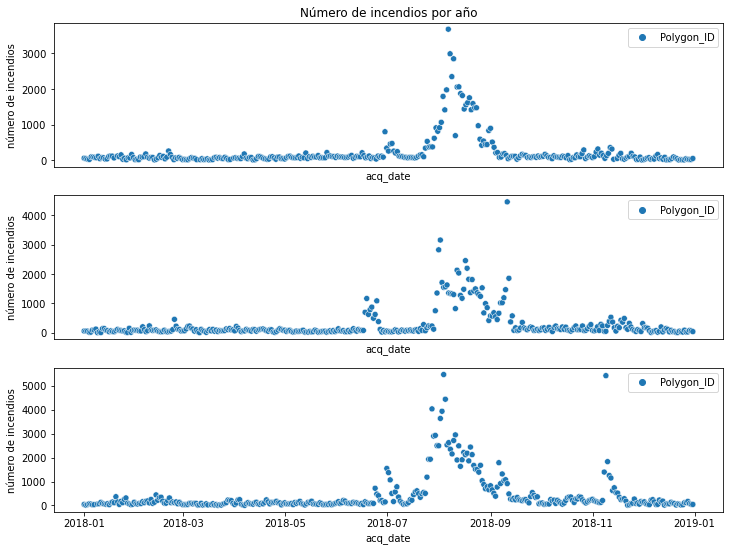

In [27]:
fig1=plt.figure(figsize=(12,9))

plt.subplot(3,1,1)
#is_2012y.plot(label = 'Canopy cover 2012',color='y')
#plt.xticks(x)
plt.title('Número de incendios por año')
sns.scatterplot(data=is_2012y,color='blue')
plt.ylabel('número de incendios')
plt.xticks([])
plt.legend()
#is_av2.plot(figsize=(10, 10))

#Segundo subplot 
plt.subplot(3,1,2)
sns.scatterplot(data=is_2015y,color='red')
plt.ylabel('número de incendios')
#plt.title('Canopy cover 2014')
plt.xticks([])
plt.legend()


#Tercer subplot 
plt.subplot(3,1,3)
sns.scatterplot(data=is_2018y,color='red')
plt.ylabel('número de incendios')
#plt.title('Canopy cover 2016')
plt.legend()





In [28]:
#Behavior of Fire Radiative Power through the years
cover=fire_30.groupby('Polygon_ID')[['CC2012_mean','CC2014_mean','CC2016_mean']].mean()
cover


,CC2012_mean,CC2014_mean,CC2016_mean
Polygon_ID,,,
72,60.673077,58.493590,59.551280
367,57.916668,57.916668,51.875000
454,45.000000,45.000000,37.564102
455,40.650887,40.650887,37.721893
747,54.822487,53.224854,52.130177
...,...,...,...
3017868,5.650887,5.650887,0.000000
3018065,4.102564,4.102564,0.000000
3018066,8.368055,8.368055,0.694444


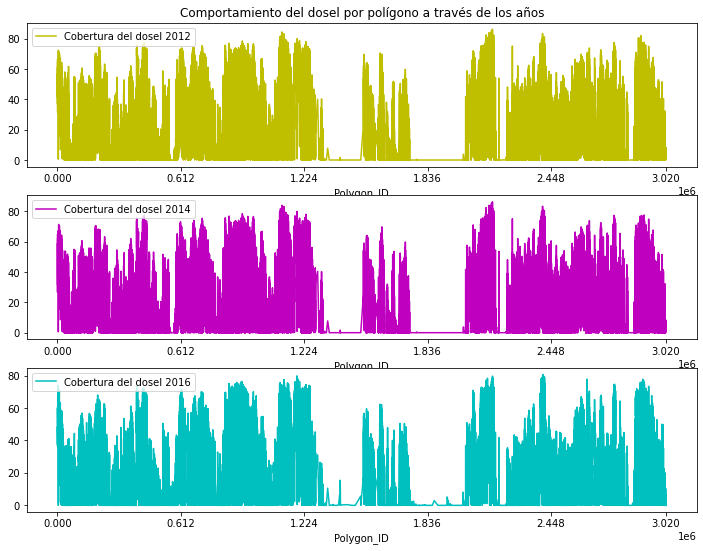

In [29]:
#Behavior of the canopy cover per polygon through the years

plt.figure(figsize=(12,9))

plt.subplot(3,1,1)
y = cover['CC2012_mean']
x=[367,612487,1224240,1836360,2448480,3019637]
y.plot(label = 'Cobertura del dosel 2012',color='y')
plt.xticks(x)
plt.title('Comportamiento del dosel por polígono a través de los años')
plt.legend()
#is_av2.plot(figsize=(10, 10))

#Segundo subplot 
plt.subplot(3,1,2)
y3 = cover['CC2014_mean']
x=[367,612487,1224240,1836360,2448480,3019637]
y3.plot(label = 'Cobertura del dosel 2014',color='m')
plt.xticks(x)
#plt.title('Canopy cover 2014')
plt.legend()


#Tercer subplot 
plt.subplot(3,1,3)
y4= cover['CC2016_mean']
x=[367,612487,1224240,1836360,2448480,3019637]
y4.plot(label = 'Cobertura del dosel 2016',color='c')
plt.xticks(x)
plt.legend()

In [31]:
density=fire_30.groupby('Polygon_ID')[['CBD2012_mean','CBD2016_mean']].mean()
density

,CBD2012_mean,CBD2016_mean
Polygon_ID,,
72,11.211538,11.692307
367,9.902778,8.166667
454,7.769231,7.224359
455,7.248521,6.952663
747,10.071006,9.710059
...,...,...
3017868,0.000000,0.000000
3018065,0.000000,0.000000
3018066,0.000000,0.125000


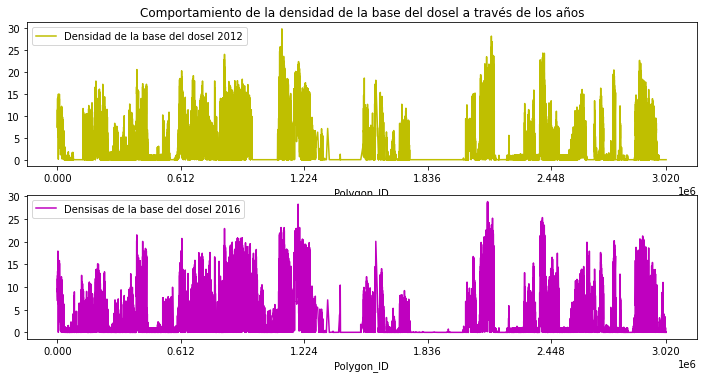

In [865]:
#Behavior of the canopy base density per polygon through the years
plt.figure(figsize=(12,9))

plt.subplot(3,1,1)
y = density['CBD2012_mean']
x=[367,612487,1224240,1836360,2448480,3019637]
y.plot(label = 'Densidad de la base del dosel 2012',color='y')
plt.xticks(x)
plt.title('Comportamiento de la densidad de la base del dosel a través de los años')
plt.legend()
#is_av2.plot(figsize=(10, 10))

#Segundo subplot 
plt.subplot(3,1,2)
y2=density['CBD2016_mean']
x=[367,612487,1224240,1836360,2448480,3019637]
y2.plot(label = 'Densidas de la base del dosel 2016',color='m')
plt.xticks(x)
plt.legend()

# Building an autoregressive model for time series

In [32]:
is_av= fire_30.pivot_table(index=['acq_date'],values=["Polygon_ID",'frp','CBH2012_mean','CBH2014_mean',
                                'CBH2016_mean','CBD2012_mean', 'CBD2016_mean', 'CC2012_mean', 'CC2014_mean',
                                  'CC2016_mean', 'CH2012_mean', 'CH2014_mean', 'CH2016_mean','Neighbour_frp','ELEV2016_mean','EVC2012_mean',
                                    'EVC2014_mean', 'EVC2016_mean','EVT2012_mean', 'EVT2014_mean', 'EVT2016_mean', 'SLP2016_mean', 'Neighbour_SLP2016_max','FVH2016_mean',
                                    'FVT2016_mean','Neighbour'],
                        aggfunc={'frp':'mean','Polygon_ID':'count','CBH2012_mean':'mean','CBH2014_mean':'mean',
                                 'CBH2016_mean':'mean','CBD2012_mean':'mean', 'CBD2016_mean':'mean', 'CC2012_mean':'mean', 'CC2014_mean':'mean',
                                  'CC2016_mean':'mean', 'CH2012_mean':'mean', 'CH2014_mean':'mean', 'CH2016_mean':'mean','Neighbour_frp':'mean',
                                 'ELEV2016_mean':'mean','EVC2012_mean':'mean',
                                  'EVC2014_mean':'mean', 'EVC2016_mean':'mean','EVT2012_mean':'mean', 'EVT2014_mean':'mean', 'EVT2016_mean':'mean', 'SLP2016_mean':'mean',
                                 'Neighbour_SLP2016_max':'mean','FVH2016_mean':'mean',
                                  'FVT2016_mean':'mean','Neighbour':'count'})





<AxesSubplot:xlabel='CC2016_mean', ylabel='CC2014_mean'>

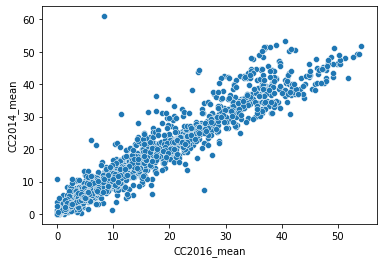

In [33]:
sns.scatterplot(data=is_av, x="CC2016_mean", y='CC2014_mean')

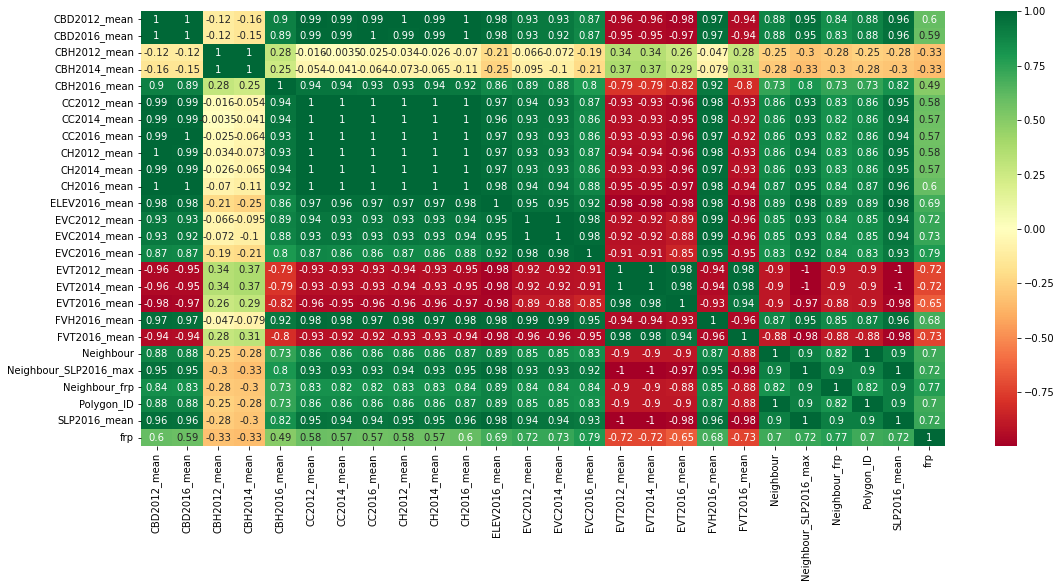

In [34]:
corr= is_av.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr.corr(),cmap= 'RdYlGn',vmin=None, vmax=None,annot=True)

plt.show()

In [35]:
#AUTOREGRESSOR MODEL 
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [36]:
#the 80% of the data points are for training the model 
train, test = is_av['frp'][:2011], is_av['frp'][2011:]

In [37]:
#the lag corresponds to one year
model = AutoReg(train, lags=365)

/Users/katiahernandez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [38]:
model_fit = model.fit()

In [39]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)+367,dynamic=False)

/Users/katiahernandez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/katiahernandez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [47]:
start = datetime.datetime.strptime("2017-08-14", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-01-01", "%Y-%m-%d")
date_generated = pd.date_range(start, end)
print (date_generated.strftime("%Y-%m-%d"))
#2019-12-31 para is_av
#2019-09-16

Index(['2017-08-14', '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
       '2017-08-19', '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
       ...
       '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
       '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01'],
      dtype='object', length=871)


In [48]:
#BUILDing A DATAFRAME WITH THE TEST AND PREDICT DATA

In [49]:
graficas = pd.DataFrame() 

In [50]:
graficas['fechas']=date_generated

In [51]:
#Para agragar test
test_1=[]
for i in test:
    test_1.append(i)

In [52]:
for i in range(368):
    test_1.append(0)
    

In [53]:
#877 870

print(graficas.shape)
print(len(predictions))
print(len(test_1))

(871, 1)
871
871


In [54]:
graficas['test']=test_1


In [ ]:
#adding the predictions

In [55]:
xx=[]
for i in predictions:
    xx.append(i)

In [56]:
graficas['predictions']=xx

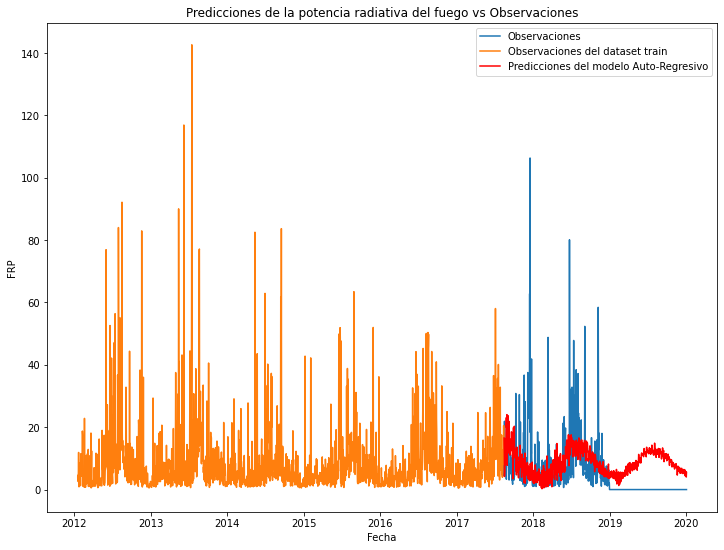

In [57]:
fig1=plt.figure(figsize=(12,9))
pyplot.plot(graficas['fechas'],graficas['test'], label='Observaciones')
pyplot.plot(train, label='Observaciones del dataset train')
pyplot.plot(graficas['fechas'],graficas['predictions'],label='Predicciones del modelo Auto-Regresivo', color='red')
plt.title('Predicciones de la potencia radiativa del fuego vs Observaciones')
plt. xlabel ('Fecha')
plt. ylabel ('FRP')
plt.legend()
plt.show()


In [ ]:
r2_lr = r2_score(y_test,predicted_y)
r2_lr

In [522]:
#Making the same model to number of fires


In [60]:
#Lag from about 2 years 
train, test = is_av['Polygon_ID'][:2011], is_av['Polygon_ID'][2011:]
model = AutoReg(train, lags=400)
model_fit = model.fit()

/Users/katiahernandez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [61]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)+367,dynamic=False)

/Users/katiahernandez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/katiahernandez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [62]:
test_num=[]
for i in test:
    test_num.append(i)

In [63]:
for i in range(368):
    test_num.append(0)

In [64]:
graficas['test_num_fires']=test_num

In [65]:
num=[]
for i in predictions:
    num.append(i)

In [66]:
graficas['predictions_fires_AR']=num

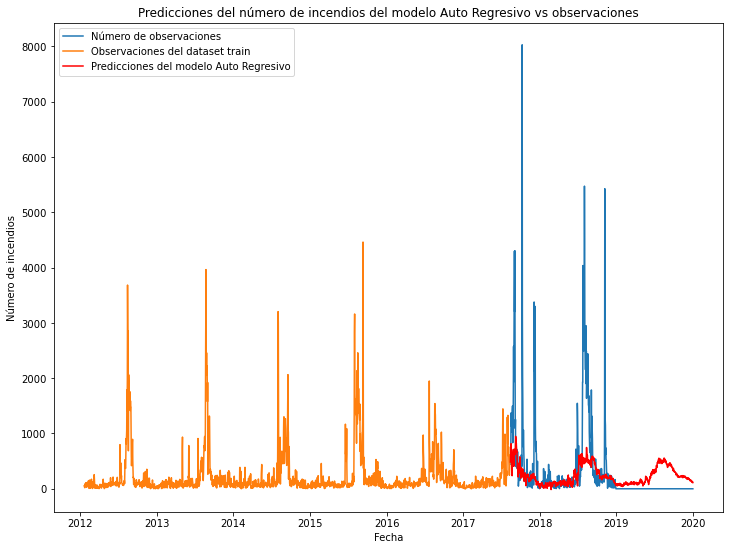

In [67]:
fig2=plt.figure(figsize=(12,9))
pyplot.plot(graficas['fechas'],graficas['test_num_fires'], label='Número de observaciones')
pyplot.plot(train, label='Observaciones del dataset train')
pyplot.plot(graficas['fechas'],graficas['predictions_fires_AR'],label='Predicciones del modelo Auto Regresivo', color='red')
#sns.lineplot(graficas['fechas'],graficas['predictions_fires_AR'])
plt.title('Predicciones del número de incendios del modelo Auto Regresivo vs observaciones')
plt. xlabel ('Fecha')
plt. ylabel ('Número de incendios')
plt.legend()
plt.show()


In [ ]:
 #CHEKING THE CORRELATION BETWEEN THE VARIABLES

In [88]:

#sns.pairplot(is_av, vars=['CBD2012_mean', 'CBD2016_mean', 'CBH2012_mean', 'CBH2014_mean',
       #'CBH2016_mean', 'CC2012_mean', 'CC2014_mean', 'CC2016_mean',
       #'CH2012_mean', 'CH2014_mean', 'CH2016_mean', 'ELEV2016_mean',
       #'EVC2012_mean', 'EVC2014_mean', 'EVC2016_mean', 'EVT2012_mean',
       #'EVT2014_mean', 'EVT2016_mean', 'FVH2016_mean', 'FVT2016_mean',
       #'Neighbour_SLP2016_max', 'Neighbour_frp', 'Polygon_ID', 'SLP2016_mean',
       #'frp'])

In [ ]:
#THEN SINCE THE CORRALTION IS NOT LINEAR, WE MAKE A NONLINAER ANALYSIS MODEL

In [147]:
#MODELO DEL VECINO MÁS CERCANO
from sklearn.neighbors import KNeighborsRegressor

In [148]:
#Como el método del vecino más cercano es sensible a outliers
for i in is_av:
    q25 = np.quantile(is_av[i], 0.25)
    q75 = np.quantile(is_av[i], 0.75)
    IQR = q75 - q25
    mask = (is_av[i] > (q75 + 3 * IQR)) | (is_av[i] < (q25 - 3 * IQR))
is_av2= is_av[~mask]


In [71]:
x=is_av2[['CBD2012_mean', 'CBD2016_mean', 'CBH2012_mean', 'CBH2014_mean',
       'CBH2016_mean', 'CC2012_mean', 'CC2014_mean', 'CC2016_mean',
       'CH2012_mean', 'CH2014_mean', 'CH2016_mean', 'ELEV2016_mean',
       'EVC2012_mean', 'EVC2014_mean', 'EVC2016_mean', 'EVT2012_mean',
       'EVT2014_mean', 'EVT2016_mean', 'FVH2016_mean', 'FVT2016_mean',
       'Neighbour_SLP2016_max', 'Neighbour_frp','SLP2016_mean','Polygon_ID','Neighbour']]
y=is_av2['frp']

print(x.shape)
print(y.shape)

(2405, 25)
(2405,)


In [149]:
#THE SPLIT WE MAKE IN THIS PART IS NOT RANDOM
p_train = 0.80 # Porcentaje de train.

train = is_av2[:int((len(is_av2))*p_train)] 
test = is_av2[int((len(is_av2))*p_train):]

print("TRAIN: ", len(train))
print("TEST: ", len(test))


TRAIN:  1924
TEST:  481


In [150]:
x_train=train.drop(['frp'],axis=1)

In [151]:
y_train=train['frp']

In [152]:
x_test=test.drop(['frp'],axis=1)

In [153]:
y_test=test['frp']

In [1046]:
#HACIENDO EL MODELO 

In [154]:
knn_fit = KNeighborsRegressor(n_neighbors=2)

In [155]:
knn_fit.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [156]:
y_pred_knn = knn_fit.predict(x_test)
len(y_pred_knn)

481

In [932]:
#ADDING THE RESULTS TO THE DATAFRAME  

In [92]:
knn=[]
for i in y_pred_knn:
    knn.append(i)
    

In [93]:
for i in range(390):
    knn.append(0)

In [94]:
graficas['prediction_knn']=knn

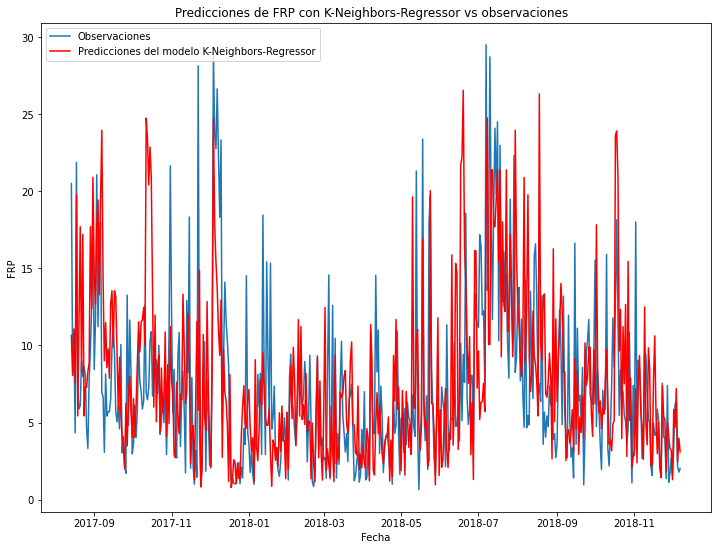

In [95]:
fig1=plt.figure(figsize=(12,9))
pyplot.plot(graficas['fechas'][:481],test['frp'][:481],label='Observaciones')
#pyplot.plot(train['frp'], label='Observationsof dataset train without outliers')
pyplot.plot(graficas['fechas'][:481],graficas['prediction_knn'][:481],label='Predicciones del modelo K-Neighbors-Regressor', color='red')
plt.title('Predicciones de FRP con K-Neighbors-Regressor vs observaciones  ')
plt. xlabel ('Fecha')
plt. ylabel ('FRP')
plt.legend()
plt.show()

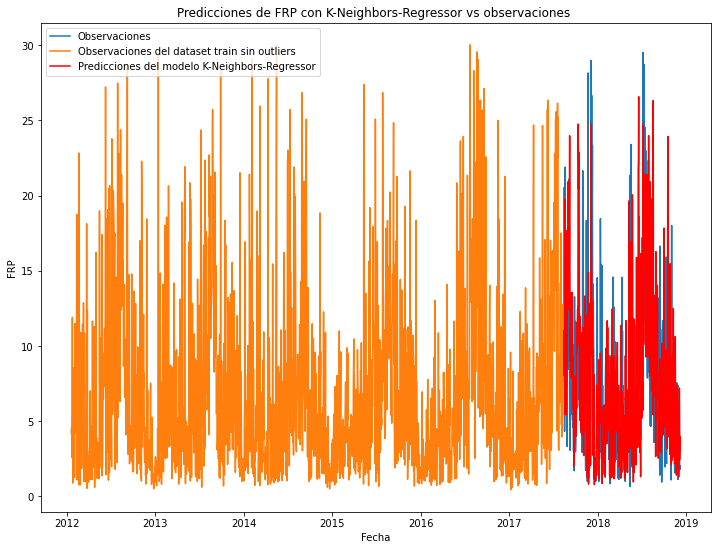

In [96]:
fig1=plt.figure(figsize=(12,9))
pyplot.plot(graficas['fechas'][:481],test['frp'][:481],label='Observaciones')
pyplot.plot(train['frp'], label='Observaciones del dataset train sin outliers')
pyplot.plot(graficas['fechas'][:481],graficas['prediction_knn'][:481],label='Predicciones del modelo K-Neighbors-Regressor', color='red')
plt.title('Predicciones de FRP con K-Neighbors-Regressor vs observaciones ')
plt. xlabel ('Fecha')
plt. ylabel ('FRP')
plt.legend()
plt.show()

In [157]:
r2_lr = r2_score(y_test,y_pred_knn)
r2_lr

0.03569840894508858

In [582]:
#RainForest


In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [159]:
hyper_parameters = {"n_estimators": range(10, 410,30 ), "max_depth": range(1, 16, 2)}
rf_fit = RandomForestRegressor()
cv_rf_fit = GridSearchCV(rf_fit, hyper_parameters, n_jobs=-1)

In [160]:
cv_rf_fit.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 16, 2),
                         'n_estimators': range(10, 410, 30)})

In [161]:
#mejor estimador 
cv_rf_fit.best_estimator_

RandomForestRegressor(max_depth=11)

In [162]:
y_pred_Grid = cv_rf_fit.predict(x_test)

In [163]:
r2_gd=r2_score(y_test,y_pred_Grid)
r2_gd

0.35290069693166926

In [103]:
#std_gd=np.round(np.sqrt(mean_squared_error((y_test),(y_pred_Grid))), 2)
#std_gd

In [104]:
#Vamos a Guardarlo en la gráfica 
gv=[]
for i in y_pred_Grid:
    gv.append(i)

In [105]:
for i in range(390):
    gv.append(0)

In [106]:
graficas['prediction_gv_rf']=gv

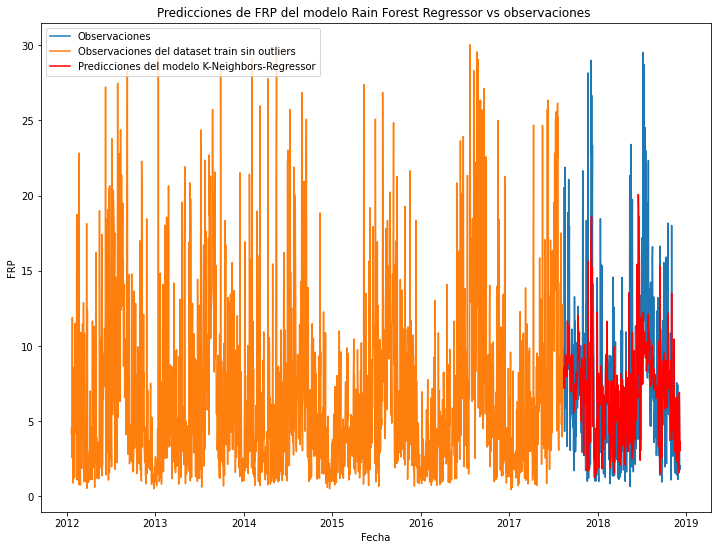

In [107]:
fig1=plt.figure(figsize=(12,9))
pyplot.plot(graficas['fechas'][:481],test['frp'][:481],label='Observaciones')
pyplot.plot(train['frp'], label='Observaciones del dataset train sin outliers')
pyplot.plot(graficas['fechas'][:481],graficas['prediction_gv_rf'][:481],label='Predicciones del modelo K-Neighbors-Regressor', color='red')
plt.title('Predicciones de FRP del modelo Rain Forest Regressor vs observaciones ')
plt. xlabel ('Fecha')
plt. ylabel ('FRP')
plt.legend()
plt.show()

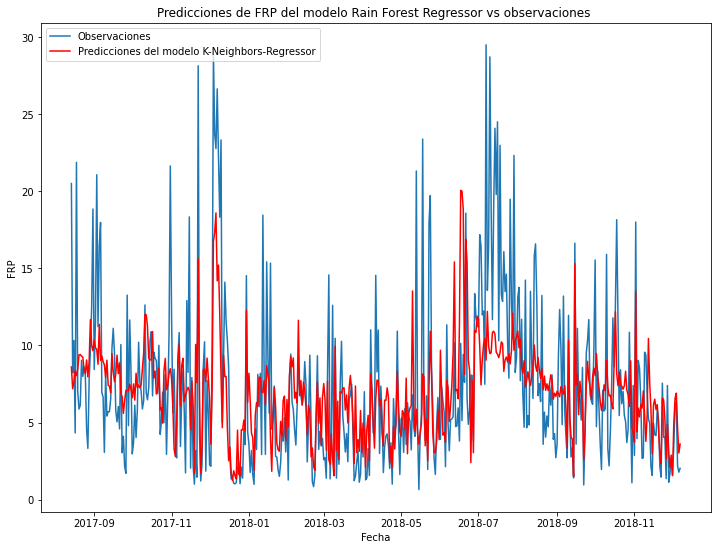

In [108]:
fig1=plt.figure(figsize=(12,9))
pyplot.plot(graficas['fechas'][:481],test['frp'][:481],label='Observaciones')
#pyplot.plot(train['frp'], label='Observaciones del dataset train sin outliers')
pyplot.plot(graficas['fechas'][:481],graficas['prediction_gv_rf'][:481],label='Predicciones del modelo K-Neighbors-Regressor', color='red')
plt.title('Predicciones de FRP del modelo Rain Forest Regressor vs observaciones ')
plt. xlabel ('Fecha')
plt. ylabel ('FRP')
plt.legend()
plt.show()

In [ ]:
#Haciendo el CatBoost

In [164]:
import catboost as cat
from catboost import CatBoostRegressor

In [165]:
cat_fit = cat.CatBoostRegressor(iterations=20000, depth=5, od_type="Iter", od_wait=500, verbose = False)

In [166]:
cat_fit.fit(x_train, y_train, eval_set=(x_test, y_test))

In [167]:
y_pred_cat = cat_fit.predict(x_test)

In [168]:
r2_cb=r2_score(y_test,y_pred_cat)
r2_cb

0.3895057654311189

In [1141]:
#std_cb=np.round(np.sqrt(mean_squared_error((y_test),(y_pred_cat))), 2)
#std_cb

In [621]:
#Guardando la variable en el dataframe 

In [113]:
cat=[]
for i in y_pred_cat:
    cat.append(i)

In [114]:
for i in range(390):
    cat.append(0)

In [115]:
graficas['prediction_catboost']=cat

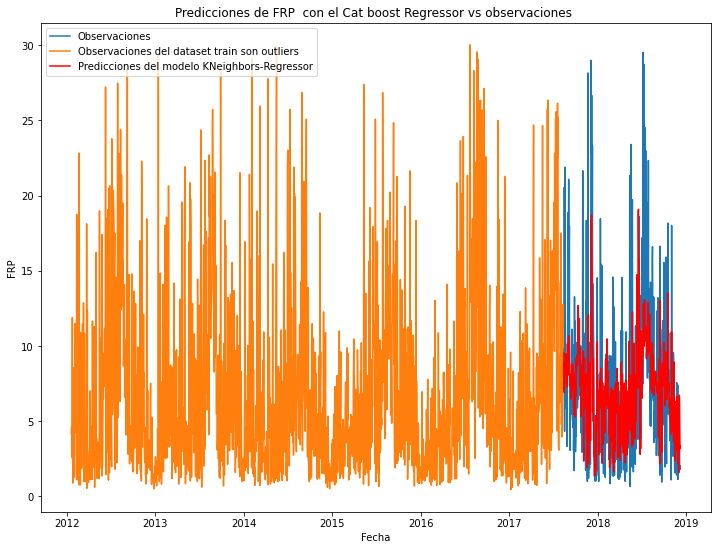

In [116]:
fig1=plt.figure(figsize=(12,9))
pyplot.plot(graficas['fechas'][:481],test['frp'][:481],label='Observaciones')
pyplot.plot(train['frp'], label='Observaciones del dataset train son outliers')
pyplot.plot(graficas['fechas'][:481],graficas['prediction_catboost'][:481],label='Predicciones del modelo KNeighbors-Regressor', color='red')
plt.title('Predicciones de FRP  con el Cat boost Regressor vs observaciones ')
plt. xlabel ('Fecha')
plt. ylabel ('FRP')
plt.legend()
plt.show()

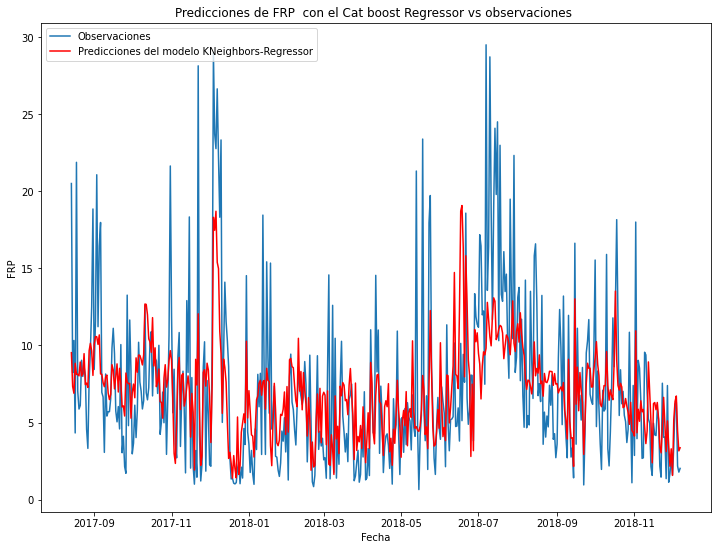

In [117]:
fig1=plt.figure(figsize=(12,9))
pyplot.plot(graficas['fechas'][:481],test['frp'][:481],label='Observaciones')
#pyplot.plot(train['frp'], label='Observaciones del dataset train son outliers')
pyplot.plot(graficas['fechas'][:481],graficas['prediction_catboost'][:481],label='Predicciones del modelo KNeighbors-Regressor', color='red')
plt.title('Predicciones de FRP  con el Cat boost Regressor vs observaciones ')
plt. xlabel ('Fecha')
plt. ylabel ('FRP')
plt.legend()
plt.show()